In [1]:
import sympy as smp
from sympy import *
import numpy as np
from numpy import *
import scipy as sp
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
from scipy.integrate import odeint
from fractions import Fraction
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])

x, y, t, n, a, b, C, c, r, u, s = smp.symbols('x y t n a b C c r u s')
f, g, m = smp.symbols('f g m', cls=smp.Function)

# 1 - 1

In [3]:
f = (1+8*x)**(1/2)
series(f, x, 0, 4)

1 + 4.0*x - 8.0*x**2 + 32.0*x**3 + O(x**4)

In [7]:
f = (1+7*x)**(1/2)
series(f, x, 0, 4)

1 + 3.5*x - 6.125*x**2 + 21.4375*x**3 + O(x**4)

# 1 - 2

In [23]:
f = (1 + x**3)**(-1/4)
series(f, x, 0, 10)

1 - 0.25*x**3 + 0.15625*x**6 - 0.1171875*x**9 + O(x**10)

# 1 - 3

In [41]:
f = (1 + (9/x))**(1/2)
s = series(f, x, smp.oo, 4, dir='-')

# Substitute x with 1/y
s_rev = s.subs(x, 1/y)

# Simplify
s_rev.simplify()

1 + 4.5*y - 10.125*y**2 + 45.5625*y**3 + O(y**4)

In [77]:
f = (1+(1/x))**(1/2)
s = series(f, x, oo, 4, dir='-')

# Substitute x with 1/y
s_reversed = s.subs(x, 1/y)

# Simplify the result
s_reversed = simplify(s_reversed)

# Simplify expressions with radicals
s_reversed = radsimp(s_reversed)

# Convert numerical coefficients to fractions
s_reversed = s_reversed.nsimplify()

s_reversed

1 + y/2 - y**2/8 + y**3/16 + O(y**4)

In [76]:
f = (1 + 3/x)**(1/2)
s = series(f, x, oo, 4, dir='-')

# Substitute x with 1/y
s_reversed = s.subs(x, 1/y)

# Simplify the result
s_reversed = simplify(s_reversed)

# Simplify expressions with radicals
s_reversed = radsimp(s_reversed)

# Convert numerical coefficients to fractions
s_reversed = s_reversed.nsimplify()

s_reversed

1 + 3*y/2 - 9*y**2/8 + 27*y**3/16 + O(y**4)

In [79]:
f = (1 + 5/x)**(1/2)
s = series(f, x, oo, 4, dir='-')

# Substitute x with 1/y
s_reversed = s.subs(x, 1/y)

# Simplify the result
s_reversed = simplify(s_reversed)

# Simplify expressions with radicals
s_reversed = radsimp(s_reversed)

# Convert numerical coefficients to fractions
s_reversed = s_reversed.nsimplify()

s_reversed # The x variable go in the denominator!!!

1 + 5*y/2 - 25*y**2/8 + 125*y**3/16 + O(y**4)

# 1 - 4

In [82]:
f = (1+3*x)**4
f_ex = expand(f)
f_ex

81*x**4 + 108*x**3 + 54*x**2 + 12*x + 1

# 1 - 6

In [133]:
smp.limit((smp.exp(x) - (1 + x)) / (10*x**2), x, 0)

1/20

# 1 - 7

In [142]:

s = Sum(((-1)**(n+1) * pi**(2*n-1)) / (6**(2*n-1) * factorial(2*n-1)), (n, 1, oo))
sum_series = s.doit()

sum_series

# Ans:
# (1/2)

Sum((-1)**(n + 1)*3.14159265358979**(2*n - 1)*6**(1 - 2*n)/factorial(2*n - 1), (n, 1, oo))

# 1 - 8

In [136]:
x = symbols('x')

s = Sum(x**n, (n, 1, smp.oo))

sum_series = s.doit()

sum_series

# Ans: 
# -x / (x-1)

Piecewise((x/(1 - x), Abs(x) < 1), (Sum(x**n, (n, 1, oo)), True))

# 2 - 1

In [149]:
# Solve for t in terms of x
t_sol = solve(5*t - 4 - x, t)

# Substitute t into the equation for y
y_eq = 25*t**2
y_sol = [simplify(y_eq.subs(t, sol)) for sol in t_sol]

y_sol

[(x + 4)**2]

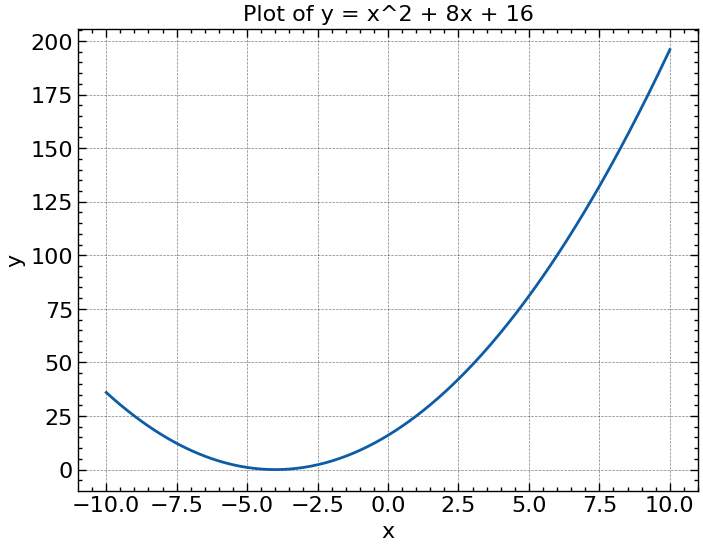

In [150]:
# Create an array of x values from -10 to 10
x = np.linspace(-10, 10, 400)

# Calculate the corresponding y values
y = x**2 + 8*x + 16

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y)

# Add title and labels
plt.title("Plot of y = x^2 + 8x + 16")
plt.xlabel("x")
plt.ylabel("y")

# Show the plot
plt.grid(True)
plt.show()

# 2 - 2

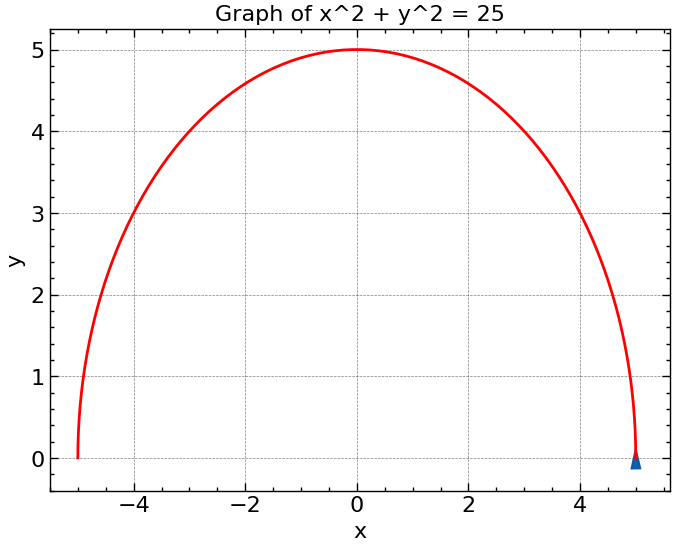

In [11]:
# Define the parameter t
t = np.linspace(0, np.pi/2, 100)

# Calculate x and y
x = 5 * np.cos(2*t)
y = 5 * np.sin(2*t)

# Plot the curve
plt.plot(x, y, 'r')

# Add an arrow to represent the direction of motion
# The arrow starts at the initial position of the particle (x[0], y[0])
# and ends at a nearby position (x[1], y[1])
plt.arrow(x[0], y[0], x[1]-x[0], y[1]-y[0], shape='full', lw=0, length_includes_head=True, head_width=.2)

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graph of x^2 + y^2 = 25')

# Display the plot
plt.show()

# 2 - 3

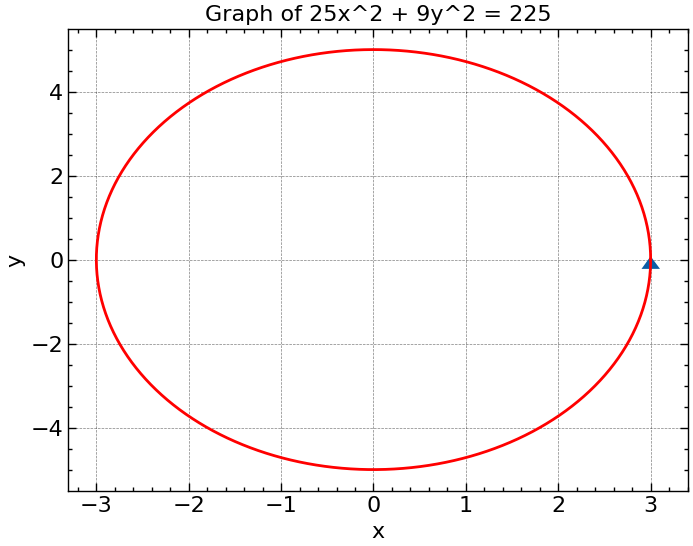

In [10]:
# Define the parameter t
t = np.linspace(0, 2*np.pi, 400)

# Calculate x and y
x = 3 * np.cos(t)
y = 5 * np.sin(t)

# Plot the curve
plt.plot(x, y, 'r')

# Add an arrow to represent the direction of motion
# The arrow starts at the initial position of the particle (x[0], y[0])
# and ends at a nearby position (x[1], y[1])
plt.arrow(x[0], y[0], x[1]-x[0], y[1]-y[0], shape='full', lw=0, length_includes_head=True, head_width=.2)

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graph of 25x^2 + 9y^2 = 225')

# Display the plot
plt.show()

# 2 - 4

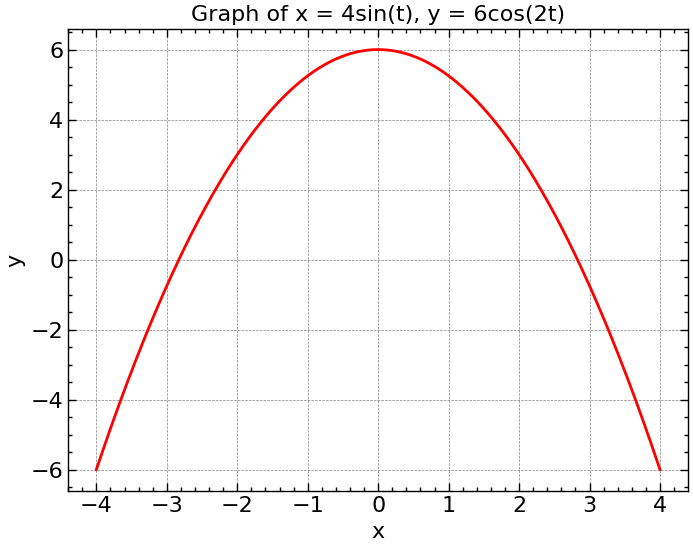

In [8]:
# Define the parameter t
t = np.linspace(-np.pi/2, np.pi/2, 400)

# Calculate x and y
x = 4 * np.sin(t)
y = 6 * np.cos(2*t)

# Plot the curve
plt.plot(x, y, 'r')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graph of x = 4sin(t), y = 6cos(2t)')

# Display the plot
plt.show()

# 2 - 5

/tmp/ipykernel_60332/3795195918.py:5: RuntimeWarning: invalid value encountered in sqrt
  y = np.sqrt((x**2 / 36 - 1) * 36)


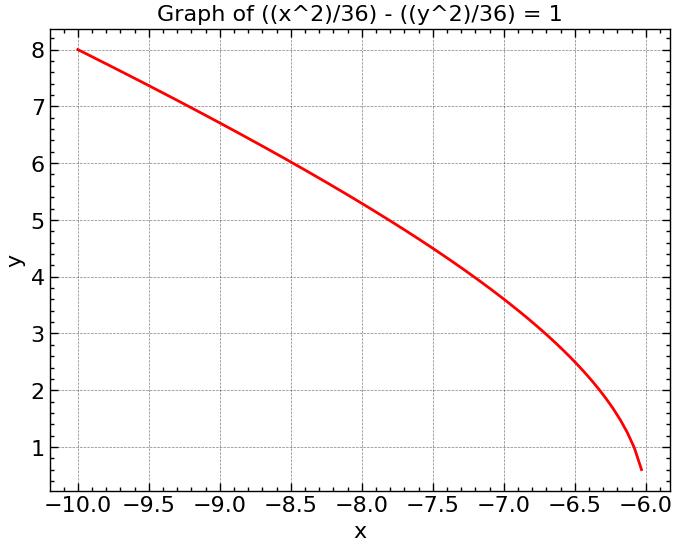

In [6]:
# Define the range of x values
x = np.linspace(-10, 0, 200)  # Only include x values less than or equal to 0

# Calculate the corresponding y values
y = np.sqrt((x**2 / 36 - 1) * 36)

# Plot the curve
plt.plot(x, y, 'r')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graph of ((x^2)/36) - ((y^2)/36) = 1')

# Display the plot
plt.show()


# 2 - 8

In [2]:
def find_parametrization(point1, point2):
    # Calculate the direction vector
    vx = point2[0] - point1[0]
    vy = point2[1] - point1[1]

    # Define the parametrization
    def parametrization(t):
        x = point1[0] + t*vx
        y = point1[1] + t*vy
        return x, y

    return parametrization

# Define the initial and final points
initial_point = (3, 3)
final_point = (0, 0)

# Find the parametrization
parametrization = find_parametrization(initial_point, final_point)

# Test the parametrization with t = 0 and t = 1
print(parametrization(0))  # Should return (3, 3)
print(parametrization(1))  # Should return (0, 0)

(3, 3)
(0, 0)


# 3 - 1